In [94]:
import matplotlib.pyplot as plt
import os
import csv
import numpy as np

In [125]:
basename = "run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000"

In [126]:
#basename = "run_ctlr_popsize=8_routs=8_zandh=False_vae_routs=1000"

In [127]:
dirname = "./plot_data/"
basename = basename + "-tag"

In [128]:
basename

'run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000-tag'

In [129]:
tags = [ "pop_mean","worst_performer", "best_performer","best_agent" ]

In [130]:
name_dict = dict(zip(tags,["population mean", "worst performer in population", "best performer in population", "average reward of best agent"]))

./plot_data/run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000-tag-pop_mean.csv
./plot_data/run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000-tag-worst_performer.csv
./plot_data/run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000-tag-best_performer.csv
./plot_data/run_ctlr_popsize=64_routs=16_zandh=False_vae_routs=1000-tag-best_agent.csv


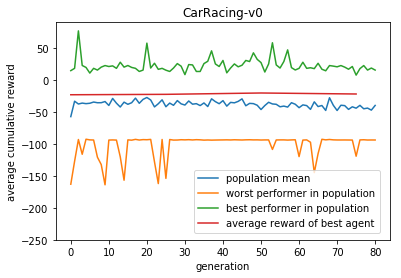

In [131]:
fig = plt.figure(1)
ax = plt.subplot(111)
for tag in tags:
    fname = "-".join([basename,tag + ".csv"])
    fpath = os.path.join(dirname,fname)
    print(fpath)
    assert os.path.exists(fpath)
    with open(fpath,"r") as f:
        arr = np.loadtxt(f,delimiter=",",skiprows=1,usecols=(1,2))
        step, val = arr[:,0], arr[:,1]
        ax.plot(step,val,label=name_dict[tag])
        
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.set_ylim(-250,90)
# Put a legend to the right of the current axis
ax.legend(loc='lower left', bbox_to_anchor=(0.4, 0.01))
ax.set_xlabel("generation")
ax.set_ylabel("average cumulative reward")
ax.set_title("CarRacing-v0")
plt.show()
        

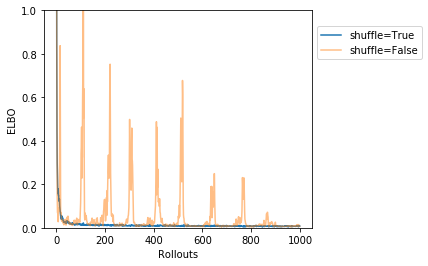

In [70]:
# fig = plt.figure(2)
# ax = plt.subplot(111)
# for fname in os.listdir(dirname):
#     if "run_vae" not in fname:
#         continue
#     if "shuffle=True" in fname:
#         shuffle = True
#         alpha =1
#     else:
#         shuffle = False
#         alpha=0.5
#     fpath = os.path.join(dirname,fname)
#     assert os.path.exists(fpath)
#     tag = "shuffle=" + str(shuffle)
#     with open(fpath,"r") as f:
#         arr = np.loadtxt(f,delimiter=",",skiprows=1,usecols=(1,2))
#         step, val = arr[:,0], arr[:,1]
        
#         ax.plot(step,val,label=tag,alpha=alpha)
        
# box = ax.get_position()
# ax.set_ylim(0,1)
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
# ax.set_xlabel("Rollouts")
# ax.set_ylabel("ELBO")
# plt.show()

run_mdn_rnn_lr=0.0001_opt=adam-tag-loss.csv
run_mdn_rnn_lr=0.0001_opt=rmsprop-tag-loss.csv
run_mdn_rnn_lr=0.001_opt=adam-tag-loss.csv


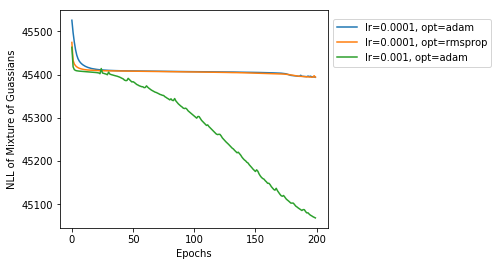

In [84]:
fig = plt.figure(3)
ax = plt.subplot(111)
for fname in os.listdir(dirname):
    if "run_mdn_rnn" not in fname:
        continue
    fpath = os.path.join(dirname,fname)
    print(fname)
    tag = "lr=" + fname.split("lr=")[-1].split("_")[0] + ", opt=" +  fname.split("opt=")[-1].split("-")[0]
    assert os.path.exists(fpath)
    with open(fpath,"r") as f:
        arr = np.loadtxt(f,delimiter=",",skiprows=1,usecols=(1,2))
        step, val = arr[:,0], arr[:,1]
        
        ax.plot(step,val,label=tag)
        
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))
ax.set_xlabel("Epochs")
ax.set_ylabel("NLL of Mixture of Guassians")
plt.show()